# Импорт библиотек

In [13]:
%pylab inline
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


/Users/polinakrivula/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['choice', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('/Applications/research-paper/src/mylib')) # or the path to your source code
sys.path.insert(0, module_path)
from main_train import train

In [14]:
%load_ext autoreload
%autoreload 2 

# Работа с данными

## Импорт статистических данных 

In [3]:
dates = pd.read_excel('/Users/polinakrivula/Downloads/типвируса/Вирусы.xlsx', index_col=0)
dates

,Total,Rhinovirus,Adenovirus,Metapneumovirus,Influenza virus,Respiratory Syncytial virus,Coronavirus,Parainfluenza virus,Bocavirus
Date,,,,,,,,,
2011-01-21,1,0,0,0,0,0,0,0,0
2011-01-22,1,0,0,0,1,0,0,0,0
2011-01-24,1,0,0,0,1,0,0,0,0
2011-01-29,3,0,0,0,2,0,0,0,0
2011-01-30,2,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-08-06,6,4,0,0,0,0,0,0,0
2020-08-07,3,2,0,0,0,0,0,0,0
2020-08-09,3,1,1,0,0,0,0,0,0


# Визуализация статистики заболеваний

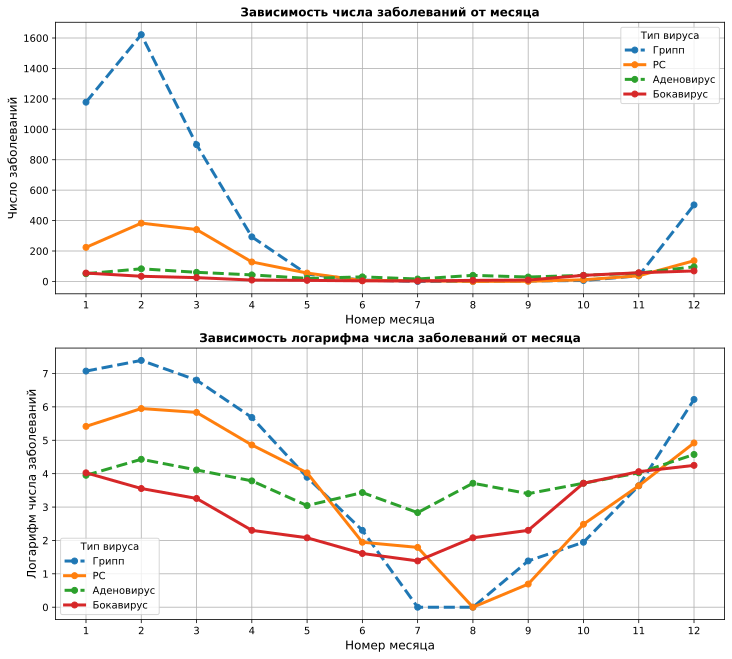

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(12,11))

#plt.suptitle('Зависимость числа заболеваний от месяца', fontsize=15, y=0.93)

plt.subplot(2, 1, 1)
plt.title('Зависимость числа заболеваний от месяца', fontsize=12, fontweight='bold')
plt.xlabel('Номер месяца', fontsize=12)
plt.ylabel('Число заболеваний', fontsize=12)
plt.xticks(np.arange(1, 13))

plt.plot(dates.groupby(dates.index.month)['Influenza virus'].sum().index, 
         dates.groupby(dates.index.month)['Influenza virus'].sum(), label='Грипп',
        marker='o', linewidth=3, linestyle='--')

plt.plot(dates.groupby(dates.index.month)['Respiratory Syncytial virus'].sum().index, 
         dates.groupby(dates.index.month)['Respiratory Syncytial virus'].sum(), label='РС',
        marker='o', linewidth=3, linestyle='-')

plt.plot(dates.groupby(dates.index.month)['Adenovirus'].sum().index, 
         dates.groupby(dates.index.month)['Adenovirus'].sum(), label='Аденовирус', 
        marker='o', linewidth=3, linestyle='--')


plt.plot(dates.groupby(dates.index.month)['Bocavirus'].sum().index, 
         dates.groupby(dates.index.month)['Bocavirus'].sum(), label='Бокавирус',
         marker='o', linewidth=3, linestyle='-')

plt.legend(title='Тип вируса')
plt.grid()

plt.subplot(2, 1, 2)
plt.title('Зависимость логарифма числа заболеваний от месяца', fontsize=12, fontweight='bold')
plt.xlabel('Номер месяца', fontsize=12)
plt.ylabel('Логарифм числа заболеваний', fontsize=12)
plt.xticks(np.arange(1, 13))

plt.plot(dates.groupby(dates.index.month)['Influenza virus'].sum().index, 
         np.log1p(dates.groupby(dates.index.month)['Influenza virus'].sum()), label='Грипп',
        marker='o', linewidth=3, linestyle='--')

plt.plot(dates.groupby(dates.index.month)['Respiratory Syncytial virus'].sum().index, 
         np.log1p(dates.groupby(dates.index.month)['Respiratory Syncytial virus'].sum()), label='РС',
        marker='o', linewidth=3, linestyle='-')

plt.plot(dates.groupby(dates.index.month)['Adenovirus'].sum().index, 
         np.log1p(dates.groupby(dates.index.month)['Adenovirus'].sum()), label='Аденовирус', 
        marker='o', linewidth=3, linestyle='--')


plt.plot(dates.groupby(dates.index.month)['Bocavirus'].sum().index, 
         np.log1p(dates.groupby(dates.index.month)['Bocavirus'].sum()), label='Бокавирус',
         marker='o', linewidth=3, linestyle='-')

plt.legend(title='Тип вируса')
plt.grid()

plt.show()

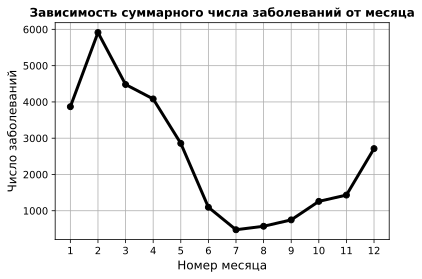

In [7]:
fig, ax = plt.subplots(1, 1)

plt.title('Зависимость суммарного числа заболеваний от месяца', fontsize=12, fontweight='bold')
plt.xlabel('Номер месяца', fontsize=12)
plt.ylabel('Число заболеваний', fontsize=12)
plt.xticks(np.arange(1, 13))
plt.plot(dates.groupby(dates.index.month)['Total'].sum().index, 
         dates.groupby(dates.index.month)['Total'].sum(), marker='o', linewidth=3, color='black')
plt.grid()

plt.show()

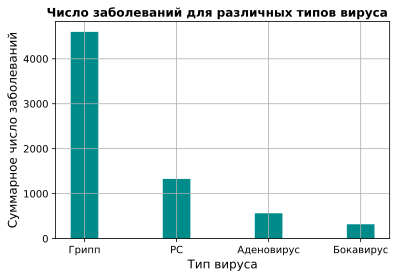

In [9]:
fig, ax = plt.subplots()

plt.suptitle('Число заболеваний для различных типов вируса', fontsize=12, y=0.93, fontweight='bold')
plt.ylabel('Суммарное число заболеваний', fontsize=12)
plt.xlabel('Тип вируса', fontsize=12)

plt.bar(['Грипп', 'РС', 'Аденовирус', 'Бокавирус'], 
        [dates['Influenza virus'].sum(), dates['Respiratory Syncytial virus'].sum(), 
         dates['Adenovirus'].sum(), dates['Bocavirus'].sum()], width=0.3, color='darkcyan')
plt.grid()

plt.show()

# Генерация выборки

In [11]:
def infl_sympt(values, prob):
    # values = ['Температура', 'Кашель', 'Одышка', 'Боли в горле', 
            # 'Ринит', 'Головная боль', 'Диарея', 'Боли в животе']
    # prob = [0.789, 0.744, 0.400, 0.169, 0.301, 0.181, 0.111, 0.091]
    ans = dict.fromkeys(values)
    for i in range(0, len(values)):
        a = random.random()
        if a <= prob[i]:
            ans[values[i]] = 1
        else:
            ans[values[i]] = 0
    return ans

In [12]:
columns = ['Тип вируса', 'Сезон', 
           'Температура', 'Кашель', 'Одышка', 'Боли в горле', 
           'Ринит', 'Головная боль', 'Диарея', 'Боли в животе']
data = pd.DataFrame(columns=columns, index=range(0, 40000))
values = ['Грипп', 'РС', 'Адено', 'Бока']

choice = random.choices(values, weights=[0.745, 0.168, 0.052, 0.037], k=10000)
for i in range(0, 10000):
    data.loc[i]['Сезон'] = 'Зима'
    data.loc[i]['Тип вируса'] = choice[i]
    
choice = random.choices(values, weights=[0.643, 0.272, 0.064, 0.021], k=10000)
for i in range(10000, 20000):
    data.loc[i]['Сезон'] = 'Весна'
    data.loc[i]['Тип вируса'] = choice[i - 10000]

choice = random.choices(values, weights=[0.075, 0.092, 0.717, 0.117], k=10000)
for i in range(20000, 30000):
    data.loc[i]['Сезон'] = 'Лето'
    data.loc[i]['Тип вируса'] = choice[i - 20000]
    
choice = random.choices(values, weights=[0.142, 0.151, 0.382, 0.326], k=10000)
for i in range(30000, 40000):
    data.loc[i]['Сезон'] = 'Осень'
    data.loc[i]['Тип вируса'] = choice[i - 30000]

values = ['Температура', 'Кашель', 'Одышка', 'Боли в горле', 
           'Ринит', 'Головная боль', 'Диарея', 'Боли в животе']
values_boca = ['Температура', 'Кашель', 'Одышка', 'Боли в горле', 
           'Ринит', 'Диарея', 'Боли в животе']
prob_infl = [0.789, 0.744, 0.400, 0.169, 0.301, 0.181, 0.111, 0.091]
prob_rs = [0.716, 0.874, 0.601, 0.115, 0.616, 0.012, 0.135, 0.082]
prob_adeno = [0.892, 0.844, 0.228, 0.700, 0.375, 0.684, 0.166, 0.165]
prob_boca = [0.615, 0.918, 0.557, 0.077, 0.808, 0.443, 0.819]
for i in range (0, 40000):
    if data.loc[i]['Тип вируса'] == 'Грипп':
        ans = infl_sympt(values, prob_infl)
    elif data.loc[i]['Тип вируса'] == 'РС':
        ans = infl_sympt(values, prob_rs)
    elif data.loc[i]['Тип вируса'] == 'Адено':
        ans = infl_sympt(values, prob_adeno)
    elif data.loc[i]['Тип вируса'] == 'Бока':
        ans = infl_sympt(values_boca, prob_boca)
        ans['Головная боль'] = '–'
    for j in ans:
        data.loc[i][j] = ans[j]
        
data = data.sample(frac=1).reset_index(drop=True)
data

,Тип вируса,Сезон,Температура,Кашель,Одышка,Боли в горле,Ринит,Головная боль,Диарея,Боли в животе
0,Адено,Лето,1,1,0,1,1,1,0,0
1,Адено,Зима,1,1,0,1,0,1,1,0
2,Бока,Лето,1,1,0,0,1,–,0,1
3,Грипп,Зима,1,1,1,0,0,0,0,1
4,Адено,Осень,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
39995,Адено,Лето,1,1,1,1,0,0,0,0
39996,Грипп,Зима,0,1,0,0,0,1,0,0
39997,РС,Весна,1,1,1,0,0,0,0,0
39998,Бока,Осень,1,1,1,0,1,–,1,0


# Эксперимент

In [31]:
ans_probs, ans = train(data)

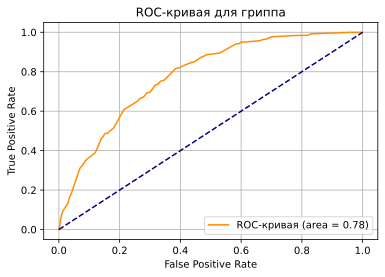

In [34]:
fpr, tpr, treshold = roc_curve((data['Тип вируса'].values == 'Грипп'), ans_probs['Грипп'])
roc_auc = auc(fpr, tpr)
# строим график
fig, ax = plt.subplots()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для гриппа')
plt.legend(loc="lower right")
plt.grid()
plt.show()

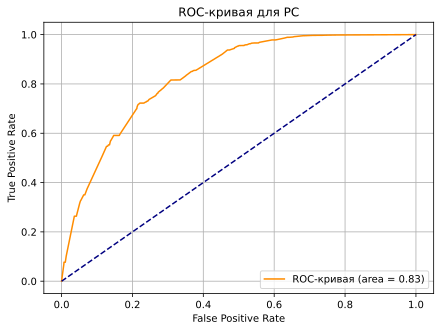

In [35]:
fpr, tpr, treshold = roc_curve((data['Тип вируса'].values == 'РС'), ans_probs['РС'])
roc_auc = auc(fpr, tpr)
# строим график
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для РС')
plt.legend(loc="lower right")
plt.grid()
plt.show()

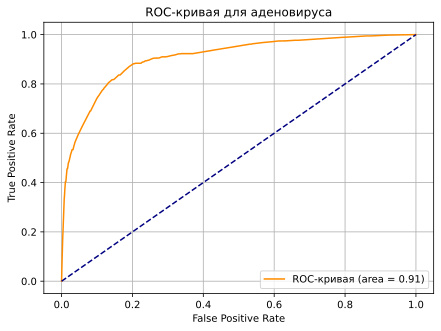

In [36]:
fpr, tpr, treshold = roc_curve((data['Тип вируса'].values == 'Адено'), ans_probs['Адено'])
roc_auc = auc(fpr, tpr)
# строим график
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для аденовируса')
plt.legend(loc="lower right")
plt.grid()
plt.show()

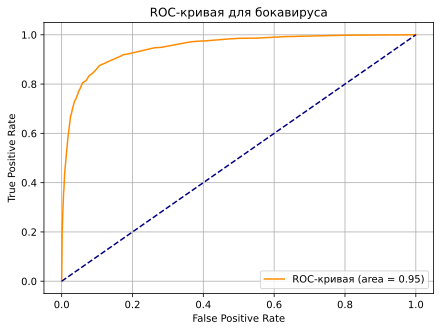

In [37]:
fpr, tpr, treshold = roc_curve((data['Тип вируса'].values == 'Бока'), ans_probs['Бока'])
roc_auc = auc(fpr, tpr)
# строим график
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для бокавируса')
plt.legend(loc="lower right")
plt.grid()
plt.show()